In [2]:
import matplotlib.pyplot as plt  
# iscrtavanje slika i plotova unutar samog browsera
%matplotlib inline 

import matplotlib.pylab as pylab
# prikaz vecih slika 
pylab.rcParams['figure.figsize'] = 21,15

import numpy as np
import cv2 # OpenCV biblioteka

def show_in_window_and_below(img, below=True):
    if (below):
        plt.imshow(img, 'gray')
    cv2.imshow('image', img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

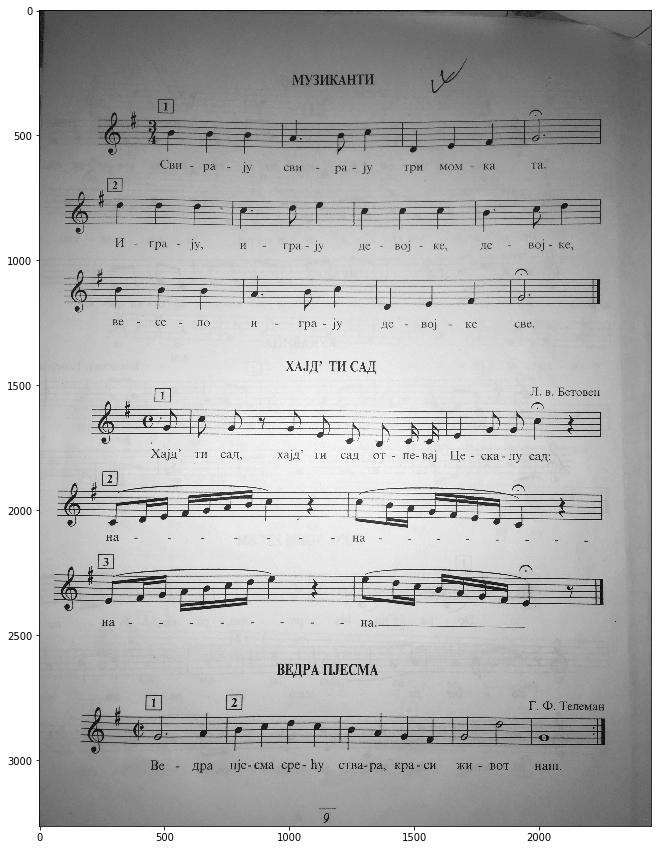

In [3]:
img = cv2.imread('images/dataset/muzikanti.JPG', 0) # read as grayscale
# img = cv2.imread('images/dataset/run_test_7x30.png', 0)
plt.imshow(img, 'gray')

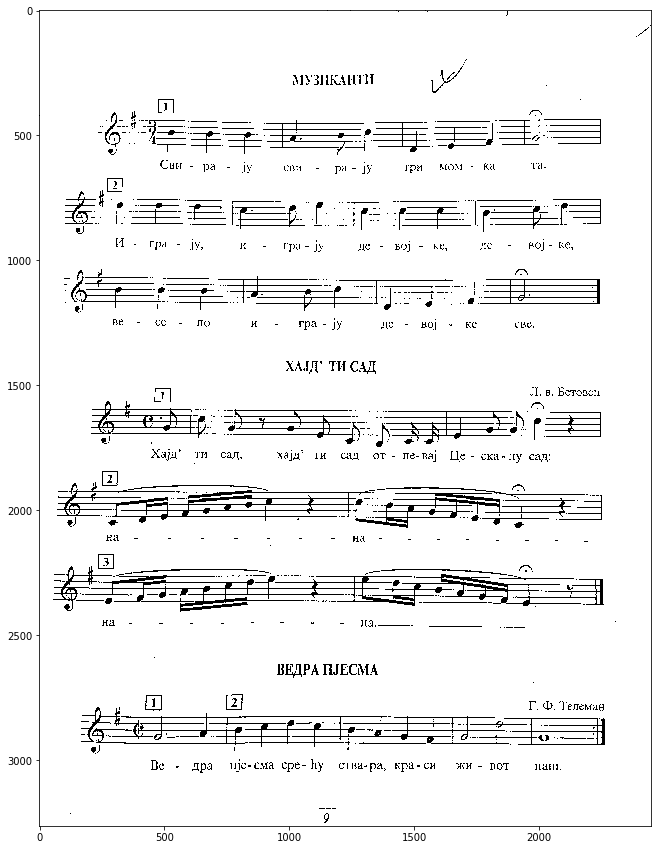

In [4]:
# GAUSS
# img_ada = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 9, 15)

# MEAN
img_ada = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 33, 35)

# only for already binarized images !!!
# img_ada = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 3)
# img_ada = img # OR this

show_in_window_and_below(img_ada)

In [19]:
kernel_w, kernel_h = 1, 30
kernel = np.ones((kernel_w, kernel_h), dtype=np.int);
# print kernel
dilated = cv2.dilate(img_ada, kernel, iterations=1)
# show_in_window_and_below(dilated, False)
cv2.imwrite('./images/dataset/dilated_'+ str(kernel_w) +'_'+ str(kernel_h) +'.jpg', dilated)

# BITWISE OPERATIONS
# BITWISE OPERATIONS  || https://stackoverflow.com/questions/11262312/opencv-intersection-between-two-binary-images
# BITWISE OPERATIONS

# show_in_window_and_below(dilated)
# cv2.imwrite('./dilated.jpg',dilated)
# dil_and_bin = cv2.bitwise_or(img_ada, dilated)
# cv2.imwrite('./dil_x_bin.jpg', dil_and_bin)

True

In [6]:
# # # # # # # # # #
#    R un         #
#   L ength       #
#  E ncoding      #
# Algotithm which calculates the lenght for runs - arrays of same consecutive elements (pixels in our case)

p = dilated.copy() # less to write !!
p = img_ada.copy()
# show_in_window_and_below(p)
# print p.shape

runs = [[1] for x in xrange(p.shape[1])] # each column starts with 1 black pixel
black_runs_flat = []
white_runs_flat = []
for c in xrange(p.shape[1]): # iterate through all columns
    # start.append(p[0,c]) # memorize the first pixel: black or white
    p[0,c] = 0 # PAINT THE FIRST PIXEL IN PREDEFINED COLOR, to make all columns start the same
    run_index = 0 # start the run
    for r in xrange(1, p.shape[0]): # for each pixel/row in current column
        if (p[r-1 ,c] != p[r, c]):  # if they are not the same,
            # memorize the run in corresponding array
            if (run_index % 2 == 0): # black run
                black_runs_flat.append(runs[c][run_index])
            else:
                white_runs_flat.append(runs[c][run_index])
            # start next run
            run_index += 1
            runs[c].append(0)
        runs[c][run_index] += 1     # add a pixel to the current run
    # the column ended ==> save the last run for the ended column
    if (run_index % 2 == 0): # black run
        black_runs_flat.append(runs[c][run_index])
    else:
        white_runs_flat.append(runs[c][run_index])

# print runs

In [7]:
black_runs = [q[::2] for q in runs]
white_runs = [q[1::2] for q in runs]
black_flat = []
# SHORTER --- flat_list = [item for sublist in l for item in sublist]
for run in black_runs:
    for item in run:
        black_flat.append(item)
print black_flat
print '-----'
print black_runs_flat
print '~~~ black_flat == black_runs_flat: ', black_flat == black_runs_flat

from collections import Counter
black_count = Counter(black_flat) # Counter({1: 3, 8: 1, 3: 1, 4: 1, 5: 1})
# print black_count

most_common_black = black_count.most_common(2)
most_common_black1, most_common_black2 = most_common_black[0][0], most_common_black[1][0]
print 'Top two most common black runs:', most_common_black1, 'and', most_common_black2

if (most_common_black1*3 < most_common_black2): # kind of a sanity check
    line_height = most_common_black1
else:
    line_height = (most_common_black1 + most_common_black2)/2.
print 'line height:  ', line_height

[1, 1, 2, 3, 4, 8, 2, 1, 2, 3, 4, 1, 4, 6, 4, 1, 4, 12, 1, 1, 1, 2, 3, 4, 3]
-----
[1, 1, 2, 3, 4, 8, 2, 1, 2, 3, 4, 1, 4, 6, 4, 1, 4, 12, 1, 1, 1, 2, 3, 4, 3]
~~~ black_flat == black_runs_flat:  True
Top two most common black runs: 1 and 4
line height:   1


In [8]:
white_flat = []
for run in white_runs:
    for item in run:
        white_flat.append(item)

print '== == == == == == == == == =='
print white_flat
print '-----'
print white_runs_flat
print '~~~ white_flat == white_runs_flat: ', white_flat == white_runs_flat

white_count = Counter(white_flat)
print white_count.most_common(50)
m_c_white = white_count.most_common(2)
space_height = (m_c_white[0][0] + m_c_white[1][0])/2.
print 'space height: ', space_height
print img_ada.shape

== == == == == == == == == ==
[1, 1, 2, 3, 4, 1, 2, 3, 4, 8, 29, 4, 12, 3, 6, 4, 29, 2, 2, 3, 4, 5]
-----
[1, 1, 2, 3, 4, 1, 2, 3, 4, 8, 29, 4, 12, 3, 6, 4, 29, 2, 2, 3, 4, 5]
~~~ white_flat == white_runs_flat:  True
[(4, 5), (2, 4), (3, 4), (1, 3), (29, 2), (5, 1), (6, 1), (8, 1), (12, 1)]
space height:  3.0
(30L, 7L)


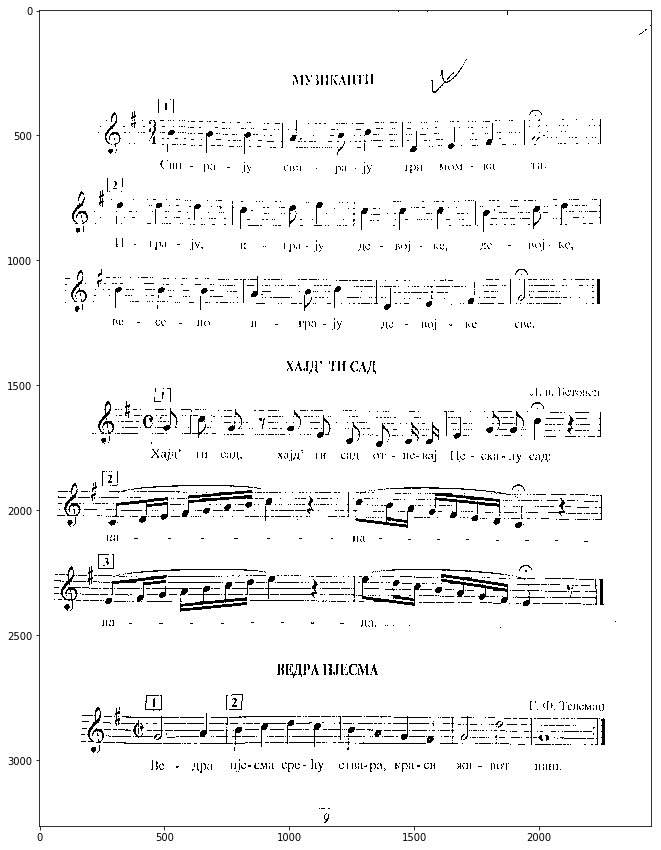

In [88]:
img = img_ada.copy() # less to write
p = img.copy()

#edit the image
for c in xrange(len(runs)):        # for every column
    cumulative = 0 # initialize the number of passed pixels
    for r in xrange(len(runs[c])): # for every run
        run_length = runs[c][r]
        if (r % 2 == 0): # black runs # every black run longer than 2 * line_height is deleted/whitened
            if (run_length < line_height*1):
                # ++ AKO JE SLJEDEĆI/PRETHODNI %% BIJELI %% RUN = VISINA PRAZNINE +-1
                # ++ AKO JE SLJEDEĆI/PRETHODNI %%  CRNI  %% RUN = VISINA LINIJE +-1
                p[cumulative:cumulative + run_length, c] = [255]*(run_length)
                img[cumulative:cumulative + run_length, c] = [255]*(run_length)
        #else: # white runs
        #    do something maybe ?
        cumulative += run_length

show_in_window_and_below(p)
cv2.imwrite('./images/dataset/result_.jpg')